### Project 1: EDA& Data Presentation - Movies Dataset

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import HTML
from pandas_profiling import ProfileReport

pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

/home/sammy/.var/app/com.vscodium.codium/data/python/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv('movies_complete.csv', parse_dates = ['release_date'])

In [5]:
df.shape

(44691, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [7]:
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.00,8854.00,7385.00,44691.00,42077.00,44691.00,43179.00,44691.00,44691.00
mean,107186.24,21.67,68.97,111.65,6.00,2.96,97.57,12.48,10.31
std,111806.36,34.36,146.61,495.32,1.28,6.04,34.65,12.12,15.89
min,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,26033.50,2.00,2.41,3.00,5.30,0.40,86.00,6.00,2.00
50%,59110.00,8.20,16.87,10.00,6.10,1.15,95.00,10.00,6.00
75%,154251.00,25.00,67.64,35.00,6.80,3.77,107.00,15.00,12.00
max,469172.00,380.00,2787.97,14075.00,10.00,547.49,1256.00,313.00,435.00


In [8]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director'],
      dtype='object')

In [9]:
df.isnull().sum()

id                           0
title                        0
tagline                  24407
release_date                34
genres                    2105
belongs_to_collection    40228
original_language           10
budget_musd              35837
revenue_musd             37306
production_companies     11335
production_countries      5856
vote_count                   0
vote_average              2614
popularity                   0
runtime                   1512
overview                   951
spoken_languages          3597
poster_path                224
cast                      2189
cast_size                    0
crew_size                    0
director                   731
dtype: int64

In [10]:
df.genres.isnull().value_counts()

False    42586
True      2105
Name: genres, dtype: int64

In [11]:
df.iloc[1]

id                                                                    8844
title                                                              Jumanji
tagline                          Roll the dice and unleash the excitement!
release_date                                           1995-12-15 00:00:00
genres                                            Adventure|Fantasy|Family
belongs_to_collection                                                  NaN
original_language                                                       en
budget_musd                                                          65.00
revenue_musd                                                        262.80
production_companies     TriStar Pictures|Teitler Film|Interscope Commu...
production_countries                              United States of America
vote_count                                                         2413.00
vote_average                                                          6.90
popularity               

In [12]:
df.iloc[1].loc[['genres', 'cast']]

genres                             Adventure|Fantasy|Family
cast      Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
Name: 1, dtype: object

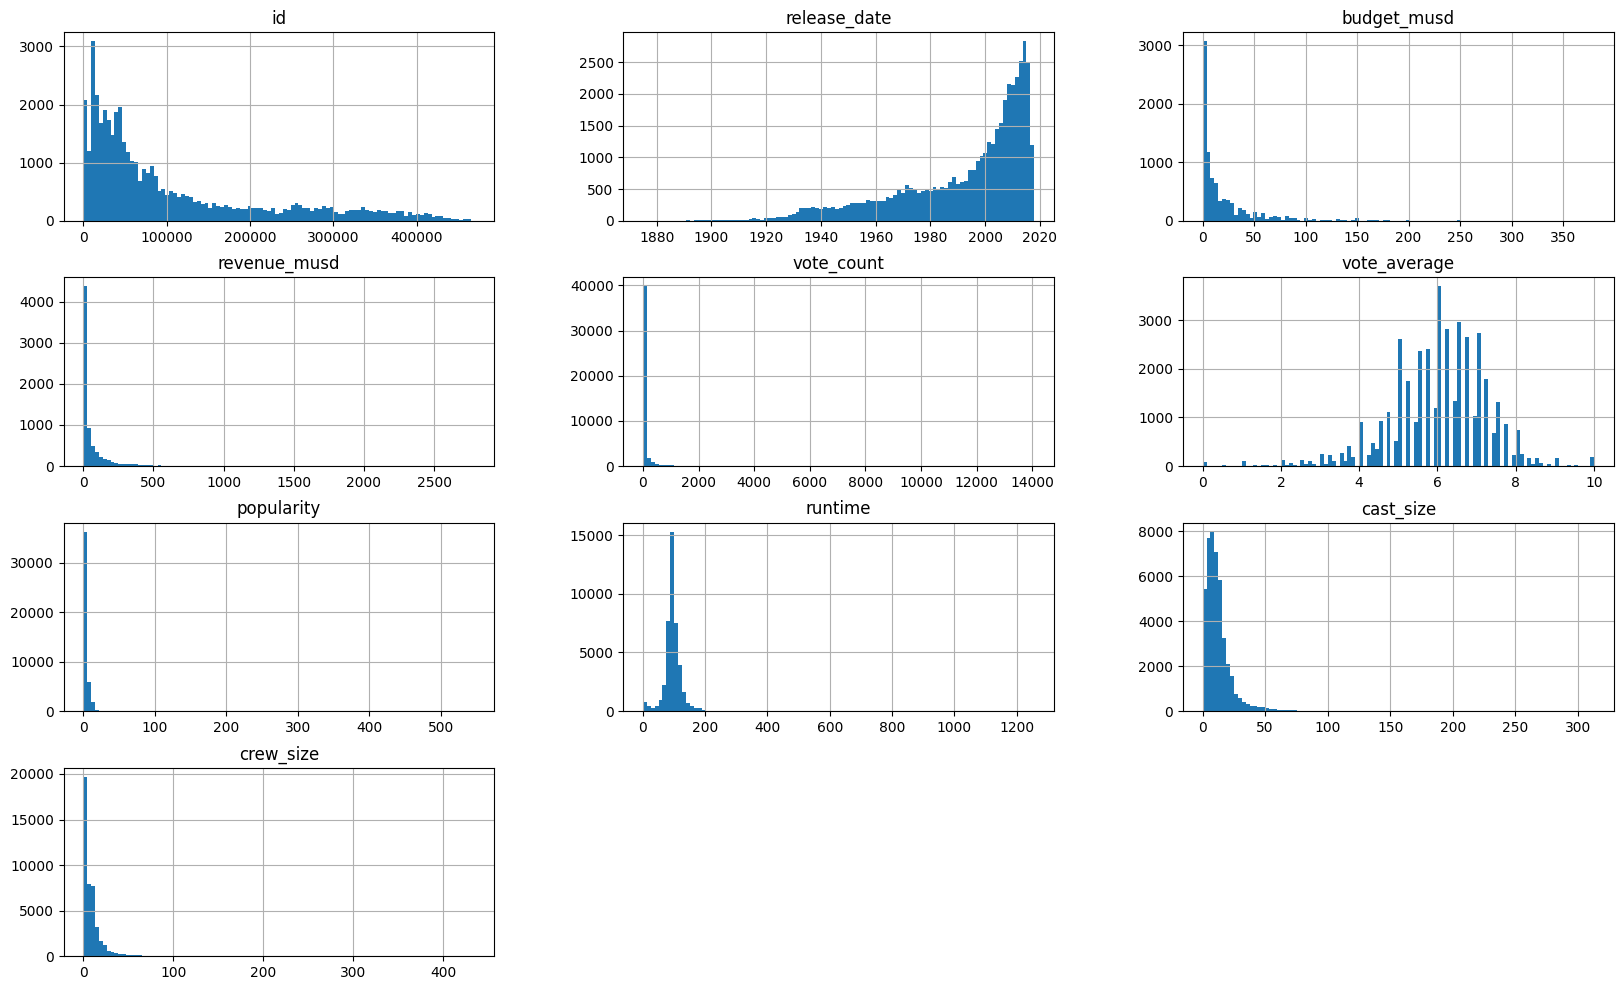

In [13]:
df.hist(figsize = (20,12), bins = 100)
plt.show()

In [14]:
df.loc[:, ['budget_musd']].value_counts(dropna = False).sort_values(ascending = False).head(10)

budget_musd
NaN            35837
5.00             286
10.00            258
20.00            243
2.00             241
15.00            226
3.00             220
25.00            206
1.00             195
30.00            189
dtype: int64

In [15]:
df.loc[:, ['budget_musd']].value_counts(dropna = False).sort_index(ascending = False).head(20)

budget_musd
380.00          1
300.00          1
280.00          1
270.00          1
260.00          3
258.00          1
255.00          1
250.00         10
245.00          2
237.00          1
230.00          1
225.00          3
220.00          1
215.00          1
210.00          2
209.00          1
207.00          1
200.00         23
197.47          1
195.00          2
dtype: int64

In [16]:
df.loc[:, ['revenue_musd']].value_counts(dropna = False).sort_values(ascending = False).head(10)

revenue_musd
NaN             37306
12.00              20
11.00              19
10.00              19
2.00               18
6.00               17
5.00               14
0.50               13
8.00               13
14.00              12
dtype: int64

In [17]:
df.loc[:, ['revenue_musd']].value_counts(dropna = False).sort_index(ascending = False).head(20)

revenue_musd
2787.97         1
2068.22         1
1845.03         1
1519.56         1
1513.53         1
1506.25         1
1405.40         1
1342.00         1
1274.22         1
1262.89         1
1238.76         1
1215.44         1
1156.73         1
1153.30         1
1123.75         1
1118.89         1
1108.56         1
1091.41         1
1084.94         1
1066.97         1
dtype: int64

In [18]:
df.loc[:, ['revenue_musd']].nunique()

revenue_musd    6850
dtype: int64

In [19]:
df.loc[:, ['vote_average']].value_counts(dropna = False).sort_values(ascending = False).head(10)

vote_average
NaN             2614
6.00            2421
5.00            1969
7.00            1859
6.50            1705
6.30            1583
5.50            1369
5.80            1358
6.40            1343
6.70            1328
dtype: int64

In [20]:
df.loc[:, ['vote_average']].max()

vote_average   10.00
dtype: float64

In [21]:
df.loc[:, ['vote_average']].median()

vote_average   6.10
dtype: float64

In [22]:
df.loc[:, ['vote_average']].mean()

vote_average   6.00
dtype: float64

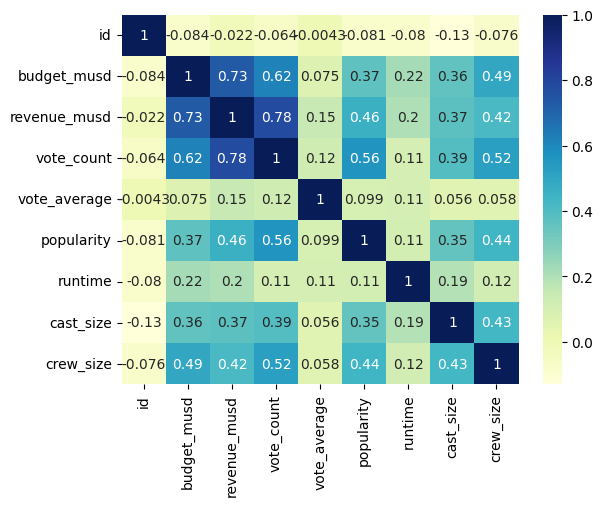

In [23]:
sns.heatmap(df.corr(numeric_only= True), cmap="YlGnBu", annot=True)
plt.show()

In [24]:
df.describe(include = 'object')

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


In [25]:
df.loc[(df.title == 'Cinderella'), :].shape

(11, 22)

In [26]:
df.loc[(df.title == 'Cinderella'), :]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.90,263.59,RKO Radio Pictures|Walt Disney Productions,United States of America,1760.00,6.80,14.44,74.00,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//avz6...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,NaN,NaN,Walt Disney Television|Citadel Entertainment|S...,United States of America,28.00,6.10,2.10,88.00,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//54aw...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,NaN,NaN,NaN,United States of America,7.00,5.40,0.36,52.00,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//bL1K...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
23265,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,NaN,NaN,GoodTimes Entertainment,Japan|United States of America,2.00,6.00,2.15,48.00,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28073,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,NaN,NaN,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,Italy,9.00,5.30,0.99,180.00,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//wjZK...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
28340,150689,Cinderella,Midnight is just the beginning.,2015-03-12,Romance|Fantasy|Family|Drama,NaN,en,95.00,543.51,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,United Kingdom|United States of America,2426.00,6.70,19.80,105.00,"When her father unexpectedly passes away, youn...",English,<img src='http://image.tmdb.org/t/p/w185//iH4C...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,NaN,NaN,Lenfilm,Russia,5.00,4.80,0.49,80.00,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41r...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,NaN,NaN,NaN,United States of America,5.00,5.90,0.21,77.00,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//cB6I...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,NaN,NaN,NaN,NaN,5.00,5.60,1.09,90.00,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//gMYk...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,NaN,NaN,Star-Film|Georges Méliès,France,19.00,5.50,1.30,5.00,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//cf0g...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès


In [27]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director'],
      dtype='object')

### Best & Worst Movies

In [30]:
df_best = df.loc[:, ['poster_path', 'title', 'budget_musd', 
'revenue_musd', 'vote_count', 'vote_average', 'popularity']].copy()

In [31]:
df_best

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.00,373.55,5415.00,7.70,21.95
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.00,262.80,2413.00,6.90,17.02
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39
...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Subdue,NaN,NaN,1.00,4.00,0.07
44687,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Century of Birthing,NaN,NaN,3.00,9.00,0.18
44688,<img src='http://image.tmdb.org/t/p/w185//eGga...,Betrayal,NaN,NaN,6.00,3.80,0.90
44689,<img src='http://image.tmdb.org/t/p/w185//aorB...,Satan Triumphant,NaN,NaN,0.00,NaN,0.00


In [38]:
df_best['profit_musd'] = df.revenue_musd.sub(df.budget_musd)
df_best['return'] = df.revenue_musd.div(df.budget_musd)


In [39]:
df_best.head(3)

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,return
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71,NaN,NaN


In [41]:
df_best.rename(columns={'poster_path': '', 'title': 'Title', 'budget_musd': 'Budget', 'revenure_musd': 'Revenue', 
'vote_count': 'Votes', 'vote_average': 'Average rating', 'popularity': 'Popularity', 'profit_musd': 'Profit', 'return': 'ROI'}, inplace=True)

In [43]:
df_best.set_index('Title', inplace=True)

In [46]:
HTML(df_best.iloc[0,0])

In [51]:
HTML(df_best.iloc[:5, :2].to_html(escape=False))

,,Budget
Title,,
Toy Story,,30.00
Jumanji,,65.00
Grumpier Old Men,,NaN
Waiting to Exhale,,16.00
Father of the Bride Part II,,NaN


In [52]:
df_best.columns

Index(['', 'Budget', 'revenue_musd', 'Votes', 'Average rating', 'Popularity',
       'Profit', 'ROI'],
      dtype='object')

In [57]:
HTML(df_best.nlargest(5, columns=['ROI']).to_html(escape=False))

,,Budget,revenue_musd,Votes,Average rating,Popularity,Profit,ROI
Title,,,,,,,,
Less Than Zero,,0.00,12.40,77.00,6.10,4.03,12.40,12396383.00
Modern Times,,0.00,8.50,881.00,8.10,8.16,8.50,8500000.00
Welcome to Dongmakgol,,0.00,33.58,49.00,7.70,4.22,33.58,4197476.62
Aquí Entre Nos,,0.00,2.76,3.00,6.00,0.23,2.76,2755584.00
"The Karate Kid, Part II",,0.00,115.10,457.00,5.90,9.23,115.10,1018619.28


In [58]:
df_best.sort_values(by=['Average rating'], ascending=False)

,,Budget,revenue_musd,Votes,Average rating,Popularity,Profit,ROI
Title,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,NaN,NaN,1.00,10.00,0.04,NaN,NaN
Brave Revolutionary,<img src='http://image.tmdb.org/t/p/w185//zAb2...,NaN,NaN,1.00,10.00,0.32,NaN,NaN
Other Voices Other Rooms,<img src='http://image.tmdb.org/t/p/w185//4ifP...,NaN,NaN,1.00,10.00,0.04,NaN,NaN
The Lion of Thebes,<img src='http://image.tmdb.org/t/p/w185//tdOc...,NaN,NaN,1.00,10.00,1.78,NaN,NaN
Katt Williams: Priceless: Afterlife,<img src='http://image.tmdb.org/t/p/w185//wKrH...,NaN,NaN,2.00,10.00,0.48,NaN,NaN
...,...,...,...,...,...,...,...,...
Altar of Fire,<img src='http://image.tmdb.org/t/p/w185//iJ78...,NaN,NaN,0.00,NaN,0.00,NaN,NaN
The Wonders of Aladdin,<img src='http://image.tmdb.org/t/p/w185//AvfX...,NaN,NaN,0.00,NaN,0.09,NaN,NaN
Deep Hearts,<img src='http://image.tmdb.org/t/p/w185//8jI4...,NaN,NaN,0.00,NaN,0.01,NaN,NaN


In [59]:
df_best.sort_values(by=['ROI'], ascending=False)

,,Budget,revenue_musd,Votes,Average rating,Popularity,Profit,ROI
Title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0...,0.00,12.40,77.00,6.10,4.03,12.40,12396383.00
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoi...,0.00,8.50,881.00,8.10,8.16,8.50,8500000.00
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGV...,0.00,33.58,49.00,7.70,4.22,33.58,4197476.62
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflx...,0.00,2.76,3.00,6.00,0.23,2.76,2755584.00
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne...,0.00,115.10,457.00,5.90,9.23,115.10,1018619.28
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.00,4.00,0.07,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.00,9.00,0.18,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.00,3.80,0.90,NaN,NaN


In [63]:
df_best.loc[(df_best['Budget'] >= 5), :].sort_values(by=['ROI'], ascending=False)

,,Budget,revenue_musd,Votes,Average rating,Popularity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,10.50,792.97,3359.00,7.30,19.36,782.47,75.52
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2...,5.00,368.74,686.00,6.20,6.72,363.74,73.75
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,11.00,775.40,6778.00,8.10,42.15,764.40,70.49
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xc...,7.00,470.65,2628.00,7.50,19.73,463.65,67.24
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwO...,5.00,328.20,512.00,6.30,7.79,323.20,65.64
...,...,...,...,...,...,...,...,...
The Blonde with Bare Breasts,<img src='http://image.tmdb.org/t/p/w185//zBjp...,7.50,NaN,3.00,4.00,0.88,NaN,NaN
Detroit,<img src='http://image.tmdb.org/t/p/w185//7APL...,34.00,NaN,67.00,7.30,9.80,NaN,NaN
"Good Guys Go to Heaven, Bad Guys Go to Pattaya",<img src='http://image.tmdb.org/t/p/w185//cfVB...,5.40,NaN,153.00,5.30,5.61,NaN,NaN


In [64]:
df_best.Budget.fillna(0, inplace=True)
df_best.Votes.fillna(0, inplace=True)

In [65]:
df_best.head(3)

,,Budget,revenue_musd,Votes,Average rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,0.00,NaN,92.00,6.50,11.71,NaN,NaN


In [67]:
df_best.shape

(44691, 8)

In [68]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Budget          44691 non-null  float64
 2   revenue_musd    7385 non-null   float64
 3   Votes           44691 non-null  float64
 4   Average rating  42077 non-null  float64
 5   Popularity      44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 4.1+ MB
